   #         Title: Wisconsin Diagnostic Breast Cancer (WDBC)

### Source Information

Citation :
   This breast cancer databases was obtained from the University of Wisconsin                               
   Hospitals, Madison from Dr. William H. Wolberg.
   
a) Creators: 
>   Dr. William H. Wolberg, General Surgery Dept., University of                         
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792                                  
	wolberg@eagle.surgery.wisc.edu
	

>	W. Nick Street, Computer Sciences Dept., University of                                 
	Wisconsin, 1210 West Dayton St., Madison, WI 53706                                          
	street@cs.wisc.edu  608-262-6619 

>	Olvi L. Mangasarian, Computer Sciences Dept., University of                                                  
	Wisconsin, 1210 West Dayton St., Madison, WI 53706                             
	olvi@cs.wisc.edu 





4. Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].

#### importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nikil reddy\Ana\envs\te

#### load data 

In [3]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Missing attribute values: none

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

1  -------  ID number

2  -------    Diagnosis (M = malignant, B = benign)

3-32 ---  Ten real-valued features are computed for each cell nucleus:
>a) radius (mean of distances from center to points on the perimeter)               
>b) texture (standard deviation of gray-scale values)                                     
>c) perimeter                        
>d) area                               
>e) smoothness (local variation in radius lengths)                                                 
>f) compactness (perimeter^2 / area - 1.0)                                                             
>g) concavity (severity of concave portions of the contour)                                                            
>h) concave points (number of concave portions of the contour)                                                  
>i) symmetry                                                                             
>j) fractal dimension ("coastline approximation" - 1)                                      

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.



In [6]:
df=data
df.drop(['id'],axis=1,inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y=df.iloc[:,0].values
x=df.iloc[:,1:].values

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Diagnosis:                 
>M(malignant) = 1                                    
>B(benign) = 0

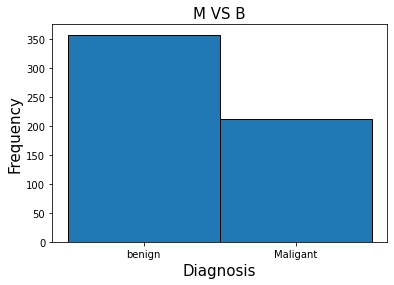

In [11]:
plt.hist(y, bins=[-.5,.5,1.5], ec="k")
plt.xlabel('Diagnosis',fontsize=15)
plt.xticks([0, 1], ['benign', 'Maligant'])
plt.ylabel('Frequency',fontsize=15)
plt.title('M VS B',fontsize=15)
plt.show()

In [12]:
e,c = np.unique(y, return_counts=True)
print(e)
print(c)

[0 1]
[357 212]


Class distribution: 
> 357 benign                                           
>212 malignant                        
>conclusion: Distribution is not completely unbalanced

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### visualizing mean attributes 

In [14]:
subset_features= ['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean','fractal_dimension_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean','concave points_mean','diagnosis']
sub=data[subset_features]
grouped = data.groupby(data.diagnosis)
mal=grouped.get_group("M")
ben=grouped.get_group("B")

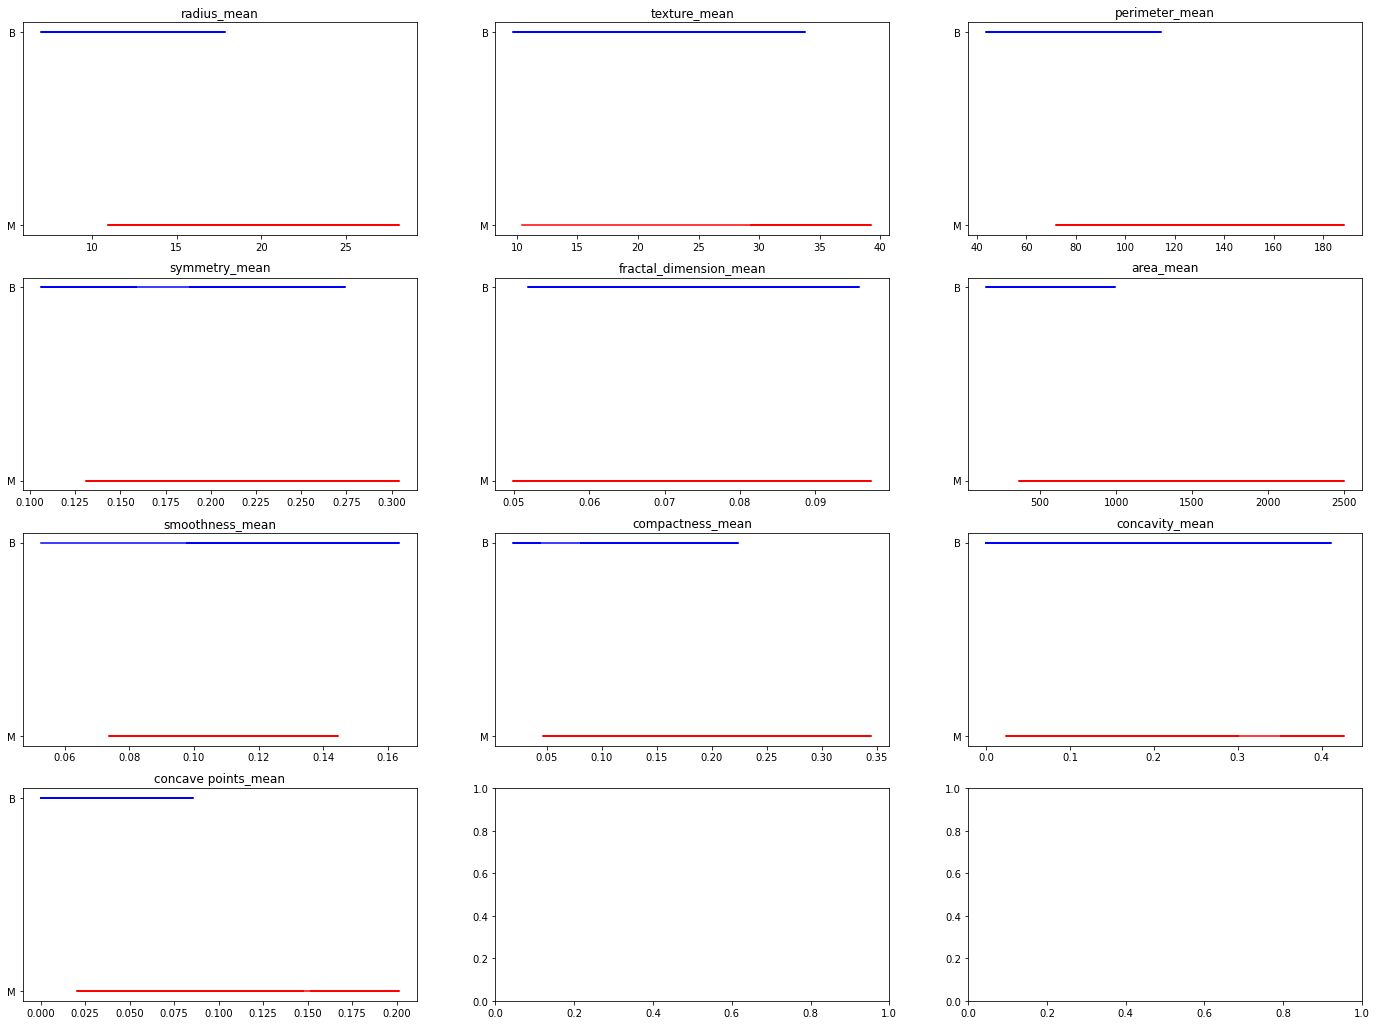

In [15]:
fig, ax =  plt.subplots(4,3,figsize=(24,18))

y=data['diagnosis']
import numpy as np
ax[0][0].plot(mal['radius_mean'],mal['diagnosis'],'r')
ax[0][0].plot(ben['radius_mean'],ben['diagnosis'],'b')
ax[0][0].set_title('radius_mean')
ax[0][1].plot(mal['texture_mean'],mal['diagnosis'],'r')
ax[0][1].plot(ben['texture_mean'],ben['diagnosis'],'b')
ax[0][1].set_title('texture_mean')
ax[0][2].plot(mal['perimeter_mean'],mal['diagnosis'],'r')
ax[0][2].plot(ben['perimeter_mean'],ben['diagnosis'],'b')
ax[0][2].set_title('perimeter_mean')
ax[1][0].plot(mal['symmetry_mean'],mal['diagnosis'],'r')
ax[1][0].plot(ben['symmetry_mean'],ben['diagnosis'],'b')
ax[1][0].set_title('symmetry_mean')
ax[1][1].plot(mal['fractal_dimension_mean'],mal['diagnosis'],'r')
ax[1][1].plot(ben['fractal_dimension_mean'],ben['diagnosis'],'b')
ax[1][1].set_title('fractal_dimension_mean')
ax[1][2].plot(mal['area_mean'],mal['diagnosis'],'r')
ax[1][2].plot(ben['area_mean'],ben['diagnosis'],'b')
ax[1][2].set_title('area_mean')
ax[2][0].plot(mal['smoothness_mean'],mal['diagnosis'],'r')
ax[2][0].plot(ben['smoothness_mean'],ben['diagnosis'],'b')
ax[2][0].set_title('smoothness_mean')
ax[2][1].plot(mal['compactness_mean'],mal['diagnosis'],'r')
ax[2][1].plot(ben['compactness_mean'],ben['diagnosis'],'b')
ax[2][1].set_title('compactness_mean')
ax[2][2].plot(mal['concavity_mean'],mal['diagnosis'],'r')
ax[2][2].plot(ben['concavity_mean'],ben['diagnosis'],'b')
ax[2][2].set_title('concavity_mean')
ax[3][0].plot(mal['concave points_mean'],mal['diagnosis'],'r')
ax[3][0].plot(ben['concave points_mean'],ben['diagnosis'],'b')
ax[3][0].set_title('concave points_mean')
plt.show()

In [16]:
subsetfeatures= ['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean','fractal_dimension_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean','concave points_mean']
sub=data[subsetfeatures]
sub.head()

,radius_mean,texture_mean,perimeter_mean,symmetry_mean,fractal_dimension_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,0.2419,0.07871,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,0.1812,0.05667,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,0.2069,0.05999,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,0.2597,0.09744,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,0.1809,0.05883,1297.0,0.10030,0.13280,0.1980,0.10430


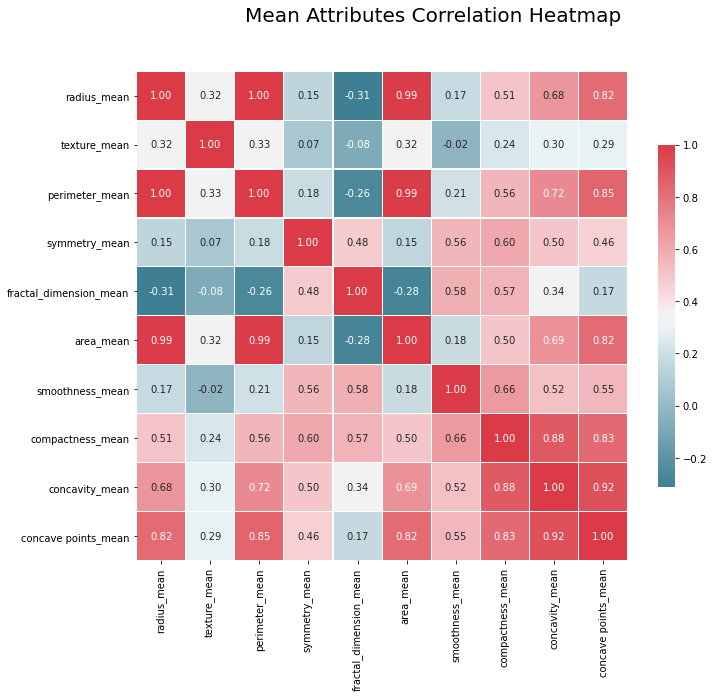

In [17]:
# Compute the correlation matrix
import seaborn as sns
corr = sub.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

t= f.suptitle('Mean Attributes Correlation Heatmap', fontsize=20)
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
           # center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
hm = sns.heatmap(corr, annot=True, ax=ax, cmap=cmap,fmt='.2f',
                 linewidths=.1,cbar_kws={"shrink": .7})

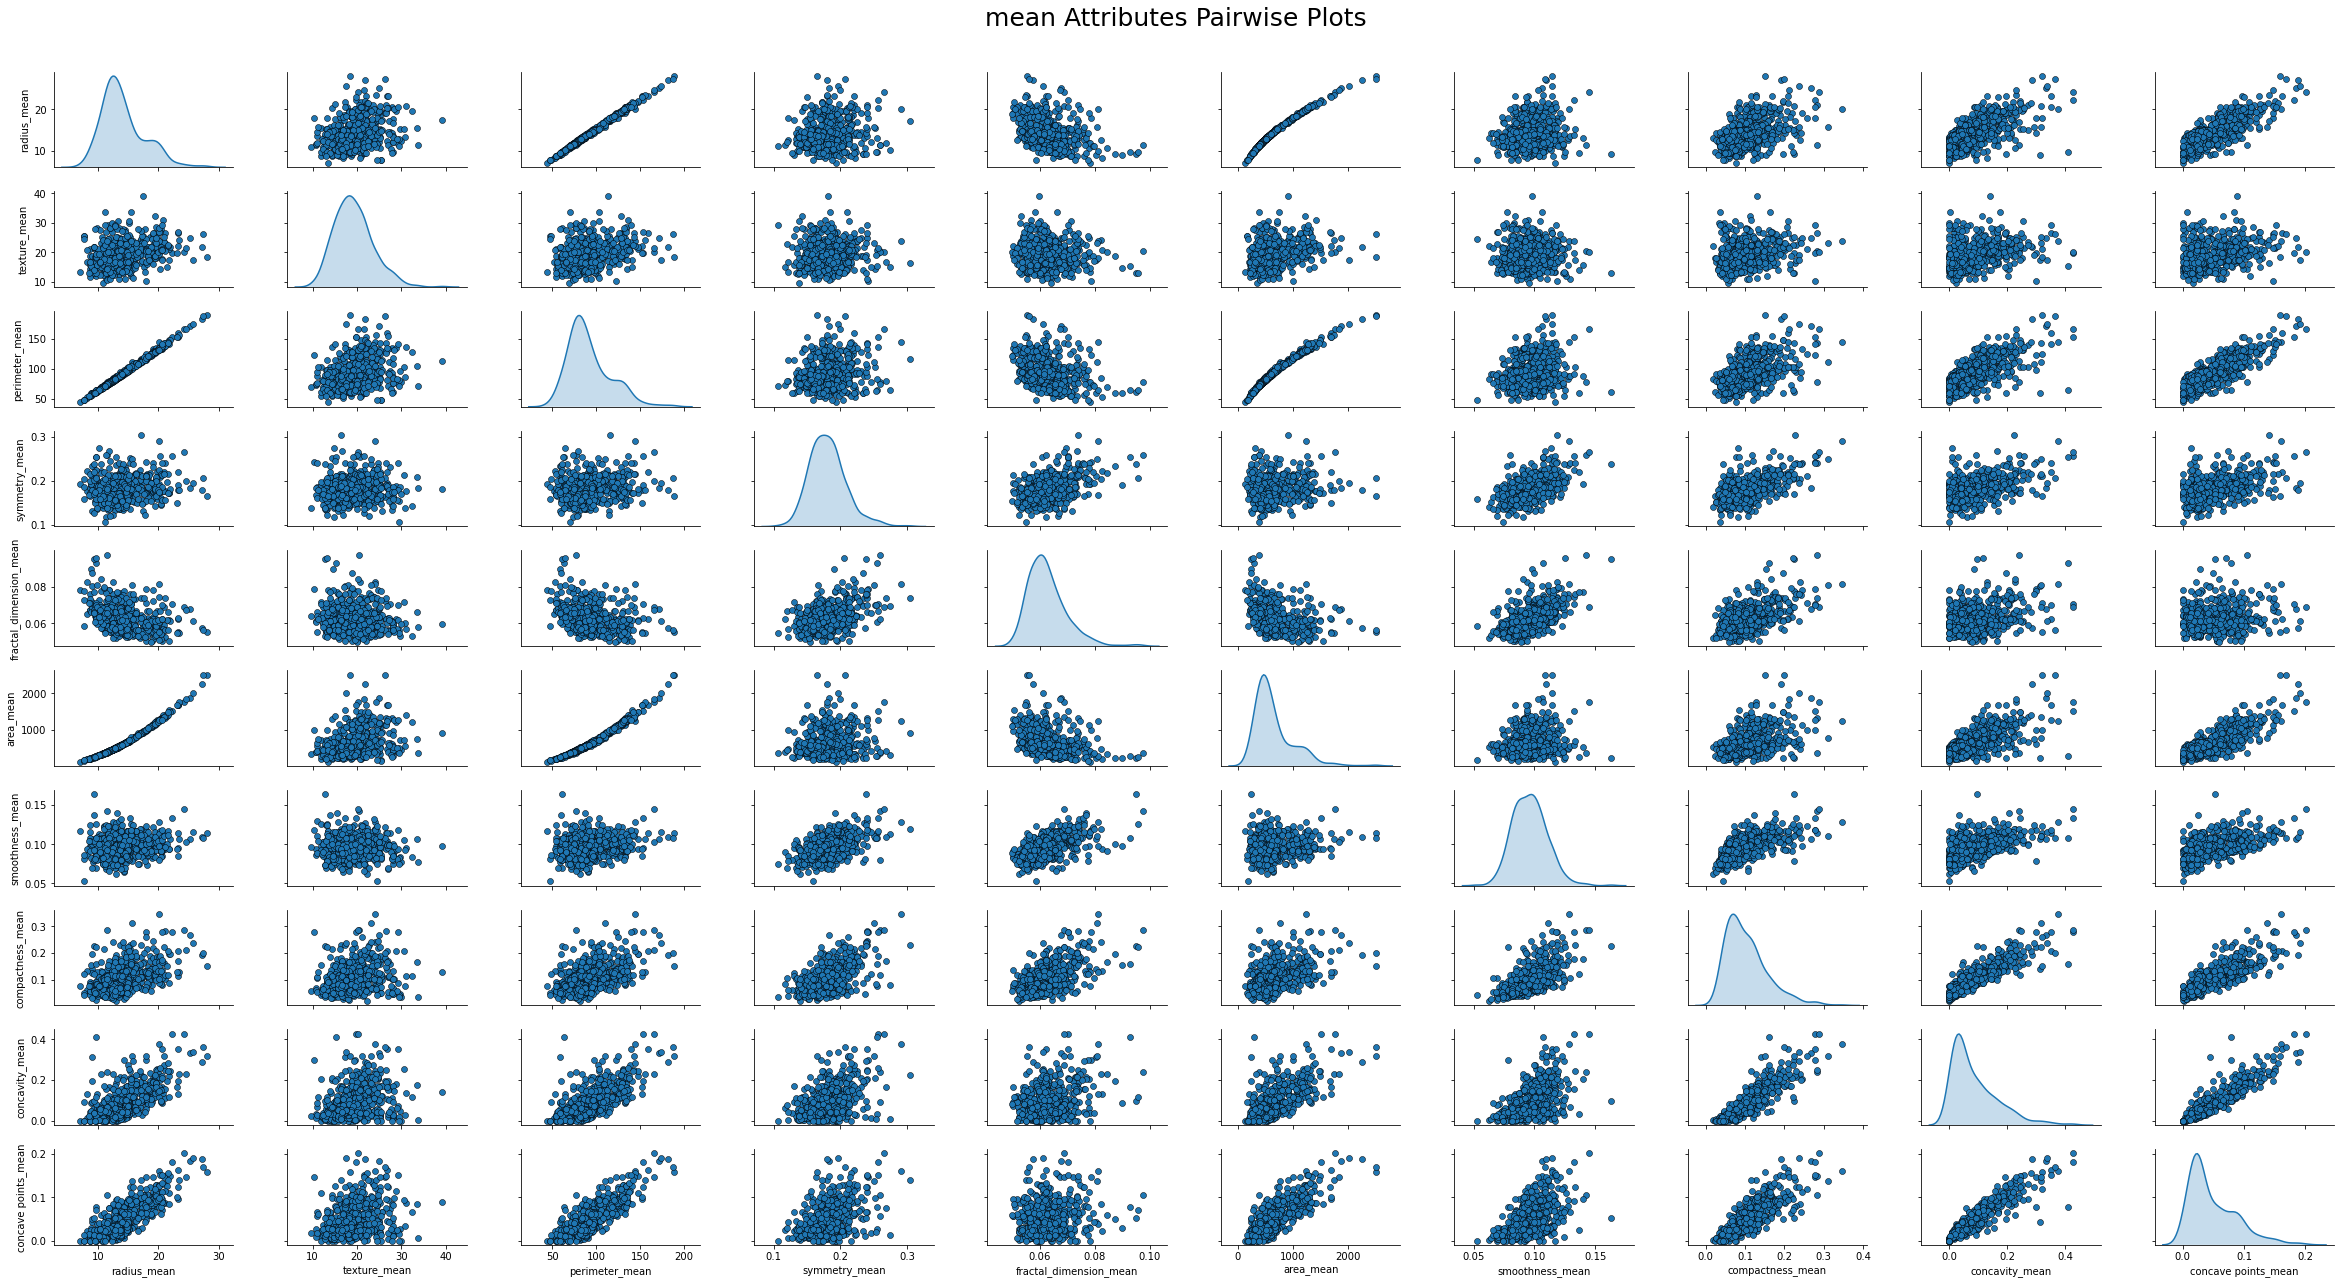

In [51]:
#pairwise plot
pp = sns.pairplot(sub, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('mean Attributes Pairwise Plots', fontsize=25)

####  Splitting the dataset into the Training set and Test set 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Normalization

In [20]:
from sklearn.preprocessing import Normalizer
N_X = Normalizer()
x_train = N_X.fit_transform(x_train)
x_test = N_X.transform(x_test)

In [21]:
x_train.shape

(455, 30)

## classifier

In [22]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(max_iter=150)
classifier1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred= classifier1.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[67,  0],
       [32, 15]], dtype=int64)

In [25]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0, degree=2,C=10)
classifier2.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
y_pred= classifier2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  1],
       [ 8, 39]], dtype=int64)

In [27]:
105/114


0.9210526315789473

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 25,max_depth=4, criterion = 'entropy', random_state = 0)
classifier3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
y_pred= classifier3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  2],
       [ 3, 44]], dtype=int64)

In [30]:
from xgboost import XGBClassifier
classifier4=XGBClassifier(n_estimators=2600,reg_lambda=0.15,max_depth=4)
classifier4.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=2600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.15, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [31]:
y_pred= classifier4.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  3],
       [ 2, 45]], dtype=int64)

#### grid search and cross validation

In [32]:
from sklearn.model_selection import GridSearchCV
'''#parameters = [{'n_estimators': [200,300,400] ,'max_depth':[2,3],'reg_lambda':[0.1,0.2,0.25]}] #xgb 4
#parameters = [{'n_estimators': [16,18,15,14] ,'max_depth':[4,5,6]}] #rf 3
#parameters = [{'max_iter':[100,90,80,5,10]}]   #lr-1
parameters = [{'degree':[1,2,3,5,4]}] #svm-2
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(x, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('done')'''

"#parameters = [{'n_estimators': [200,300,400] ,'max_depth':[2,3],'reg_lambda':[0.1,0.2,0.25]}] #xgb 4\n#parameters = [{'n_estimators': [16,18,15,14] ,'max_depth':[4,5,6]}] #rf 3\n#parameters = [{'max_iter':[100,90,80,5,10]}]   #lr-1\nparameters = [{'degree':[1,2,3,5,4]}] #svm-2\ngrid_search = GridSearchCV(estimator = classifier,\n                           param_grid = parameters,\n                           scoring = 'accuracy',\n                           cv = 5,\n                           n_jobs = -1)\ngrid_search = grid_search.fit(x, y)\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_\nprint('done')"

In [33]:
#lr
parameters = [{'max_iter':[500, 1000, 1000,2000]}]   #lr-1
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('done')
print(best_accuracy)
best_parameters

done
0.9543233082706767


C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'max_iter': 2000}

In [34]:
#svm
parameters = [{'degree':[1,2,3,4]}] #svm-2
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('done')
print(best_accuracy)
best_parameters

done
0.9192042606516291


{'degree': 1}

In [35]:
#rf
parameters = [{'n_estimators': [10,15,20,25,30] ,'max_depth':[4,5,6]}] #rf 3
grid_search = GridSearchCV(estimator = classifier3,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('done')
print(best_accuracy)
best_parameters

done
0.9631265664160402


{'max_depth': 5, 'n_estimators': 25}

In [36]:
#xgb
parameters = [{'n_estimators': [100,150,200,250] ,'max_depth':[1,2,3],'reg_lambda':[0.1,0.2,0.25]}] #xgb 4
grid_search = GridSearchCV(estimator = classifier4,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('done')
print(best_accuracy)
best_parameters

done
0.9789160401002507


{'max_depth': 2, 'n_estimators': 150, 'reg_lambda': 0.2}

grid search 
> logistic regression:
>>0.9543233082706767  
>>{'max_iter': 2000}                             

> rbf svm:
>>0.9192042606516291   
>>{'degree': 1}                        

>random forest:
>>0.9631265664160402   
>>{'max_depth': 5, 'n_estimators': 25}

>xgboost:
>>0.9789160401002507   
>>{'max_depth': 2, 'n_estimators': 150, 'reg_lambda': 0.2}

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(max_iter=2000)
classifier1.fit(x_train,y_train)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier1, X=x , y=y , cv=10) #1-svm , 2-rf , 3-xgb
print(acc)
print(acc.mean())
acc.std()

[0.98245614 0.9122807  0.94736842 0.94736842 0.98245614 0.98245614
 0.92982456 0.94736842 0.96491228 0.96428571]
0.956077694235589


0.022511878245864883

In [39]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0, degree=1,C=10)
classifier2.fit(x_train, y_train)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier2, X=x , y=y , cv=10) #1-svm , 2-rf , 3-xgb
print(acc)
print(acc.mean())
acc.std()

[0.87719298 0.87719298 0.89473684 0.94736842 0.94736842 0.87719298
 0.96491228 0.92982456 0.92982456 0.94642857]
0.9192042606516291


0.032459058349972265

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 25,max_depth=5, criterion = 'entropy', random_state = 0)
classifier3.fit(x_train, y_train)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier3, X=x , y=y , cv=10) #1-svm , 2-rf , 3-xgb
print(acc)
print(acc.mean())
acc.std()

[0.98245614 0.89473684 0.94736842 0.96491228 0.98245614 0.98245614
 0.94736842 0.98245614 0.96491228 0.98214286]
0.9631265664160402


0.026526061260445856

In [41]:
from xgboost import XGBClassifier
classifier4=XGBClassifier(n_estimators=150,reg_lambda=0.2,max_depth=2)
classifier4.fit(x_train, y_train)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier4, X=x , y=y , cv=10) #1-svm , 2-rf , 3-xgb
print(acc)
print(acc.mean())
acc.std()

[0.98245614 0.94736842 0.98245614 0.98245614 0.98245614 0.98245614
 0.96491228 1.         0.98245614 0.98214286]
0.9789160401002507


0.013120583511613658

cross validation 
> logistic regression:
>>acc.mean : 0.956077694235589       
>>acc.std : 0.022511878245864883  

> rbf svm:
>>acc.mean : 0.9192042606516291          
>>acc.std  : 0.032459058349972265                     

>random forest: 
>>acc.mean : 0.9631265664160402          
>>acc.std:0.026526061260445856               

>xgboost:
>>acc.mean : 0.9789160401002507         
>>acc.std:0.013120583511613658



xgboost is best ny accuracy      
logistic regression by standard deviation                                      
however std of xgboost is not bad , so xgboost is comparatively better model

#### confusion matrix

In [42]:
y_pred= classifier1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[67,  0],
       [32, 15]], dtype=int64)

In [43]:
(67+15)/(67+15+32)

0.7192982456140351

val acc: 0.7192982456140351                            
>mean acc(cv): 0.956077694235589                        
>conclusion:ovefit


In [44]:
y_pred= classifier2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  1],
       [ 8, 39]], dtype=int64)

In [45]:
(66+39)/(66+39+8+1)

0.9210526315789473

                                         
test  acc: 0.9210526315789473
>mean acc: 0.9192042606516291                                    
>conclusion: test  accuracy is better than CV  mean accuracy of   (less data & data sampling may be the reason )

In [46]:
y_pred= classifier3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  3],
       [ 3, 44]], dtype=int64)

In [47]:
(64+44)/(64+44+3+3)

0.9473684210526315

                               
test acc: 0.9473684210526315
>mean acc : 0.9631265664160402         
>conclusion:good fit

In [48]:
y_pred= classifier4.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[67,  0],
       [ 1, 46]], dtype=int64)

In [49]:
(67+46)/(67+46+1)

0.9912280701754386

test acc: 0.9912280701754386
> acc mean: 0.9789160401002507                               
>conclusion: best fit with ac
curacy about 0.98

#### accuracies: 


>Logistic regression -- 0.72                                    
>Support vector machine -- 0.92                                    
>Random forest -- 0.95                                          
>Xgboost -- 0.98
    

.>>Created by Nikhil Reddy
